# **Machine Learning Project | Predicting Popularity of Leading eCommerce's Reviews**

# **Data Collection**

# Mount Drive

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Model data:**

This dataset contains the information of 28000 reviews with the respective target variable (column named "shares").

In [42]:
import pandas as pd
model = pd.read_csv("model.csv", sep = ",")
model.tail()

,age_days,n_tokens_title,n_tokens_review,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
27995,694,9,214,0.455399,1.0,0.412429,43,3,11,0,...,0.200000,1.0,-0.333333,-0.333333,-0.333333,0.000000,0.000000,0.500000,0.000000,7400
27996,428,8,206,0.647059,1.0,0.851240,5,3,0,1,...,0.100000,0.5,-0.622222,-1.000000,-0.166667,0.454545,0.136364,0.045455,0.136364,6100
27997,93,11,1083,0.535104,1.0,0.712627,32,27,11,1,...,0.100000,1.0,-0.404306,-1.000000,-0.050000,0.000000,0.000000,0.500000,0.000000,1200
27998,90,12,817,0.452229,1.0,0.585170,12,0,2,0,...,0.100000,0.7,-0.288889,-0.900000,-0.100000,0.000000,0.000000,0.500000,0.000000,1200
27999,681,13,1239,0.382686,1.0,0.537212,12,10,10,1,...,0.033333,1.0,-0.128770,-0.187500,-0.071429,0.727273,0.068182,0.227273,0.068182,2500


# **Data Pre-Processing (model.csv)**

Before going any further let's look at model.csv to understand better the data and find top level patterns.

####**1.  Structure of model.csv**

In [43]:
print(type(model))

<class 'pandas.core.frame.DataFrame'>


In [44]:
print(model.shape)

(28000, 48)


In [45]:
#Remove white space from the variable name
model = model.rename(columns=lambda x: x.strip())
model.columns

Index(['age_days', 'n_tokens_title', 'n_tokens_review', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'product_category', 'kw_min_min', 'kw_max_min',
       'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'day',
       'topic_quality', 'topic_shipping', 'topic_packaging',
       'topic_description', 'topic_others', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_pol

In [46]:
model.dtypes

age_days                          int64
n_tokens_title                    int64
n_tokens_review                   int64
n_unique_tokens                 float64
n_non_stop_words                float64
n_non_stop_unique_tokens        float64
num_hrefs                         int64
num_self_hrefs                    int64
num_imgs                          int64
num_videos                        int64
average_token_length            float64
num_keywords                      int64
product_category                 object
kw_min_min                        int64
kw_max_min                      float64
kw_avg_min                      float64
kw_min_max                        int64
kw_max_max                        int64
kw_avg_max                      float64
kw_min_avg                      float64
kw_max_avg                      float64
kw_avg_avg                      float64
self_reference_min_shares       float64
self_reference_max_shares       float64
self_reference_avg_sharess      float64


In [47]:
# Change the values which type is float64 into 4 decimals
for column in model.columns:
    # Check if the datatype of the column is float64
    if model[column].dtype == 'float64':
        # Round the values in that column to 4 decimal places
        model[column] = model[column].round(4)

model

,age_days,n_tokens_title,n_tokens_review,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,436,9,532,0.4623,1.0,0.5944,7,7,1,0,...,0.1364,1.0,-0.1806,-0.2500,-0.1250,0.5000,0.5000,0.0000,0.5000,2200
1,185,16,1012,0.4462,1.0,0.6381,4,2,3,11,...,0.1000,0.9,-0.3190,-1.0000,-0.0500,0.0500,-0.0750,0.4500,0.0750,816
2,210,12,506,0.5466,1.0,0.6933,8,3,2,1,...,0.0500,0.5,-0.2927,-0.7500,-0.1000,0.0000,0.0000,0.5000,0.0000,1000
3,723,11,241,0.5439,1.0,0.6486,5,4,1,1,...,0.1364,0.7,0.0000,0.0000,0.0000,0.0000,0.0000,0.5000,0.0000,660
4,345,11,983,0.4059,1.0,0.5947,11,7,1,1,...,0.1000,1.0,-0.2565,-0.8000,-0.0500,0.0000,0.0000,0.5000,0.0000,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,694,9,214,0.4554,1.0,0.4124,43,3,11,0,...,0.2000,1.0,-0.3333,-0.3333,-0.3333,0.0000,0.0000,0.5000,0.0000,7400
27996,428,8,206,0.6471,1.0,0.8512,5,3,0,1,...,0.1000,0.5,-0.6222,-1.0000,-0.1667,0.4545,0.1364,0.0455,0.1364,6100
27997,93,11,1083,0.5351,1.0,0.7126,32,27,11,1,...,0.1000,1.0,-0.4043,-1.0000,-0.0500,0.0000,0.0000,0.5000,0.0000,1200
27998,90,12,817,0.4522,1.0,0.5852,12,0,2,0,...,0.1000,0.7,-0.2889,-0.9000,-0.1000,0.0000,0.0000,0.5000,0.0000,1200


In [48]:
model.drop_duplicates(inplace=True)
print(model.shape)

(28000, 48)


In [49]:
#Target Variable
target = model["shares"]
target

0        2200
1         816
2        1000
3         660
4        1000
         ... 
27995    7400
27996    6100
27997    1200
27998    1200
27999    2500
Name: shares, Length: 28000, dtype: int64

<Axes: >

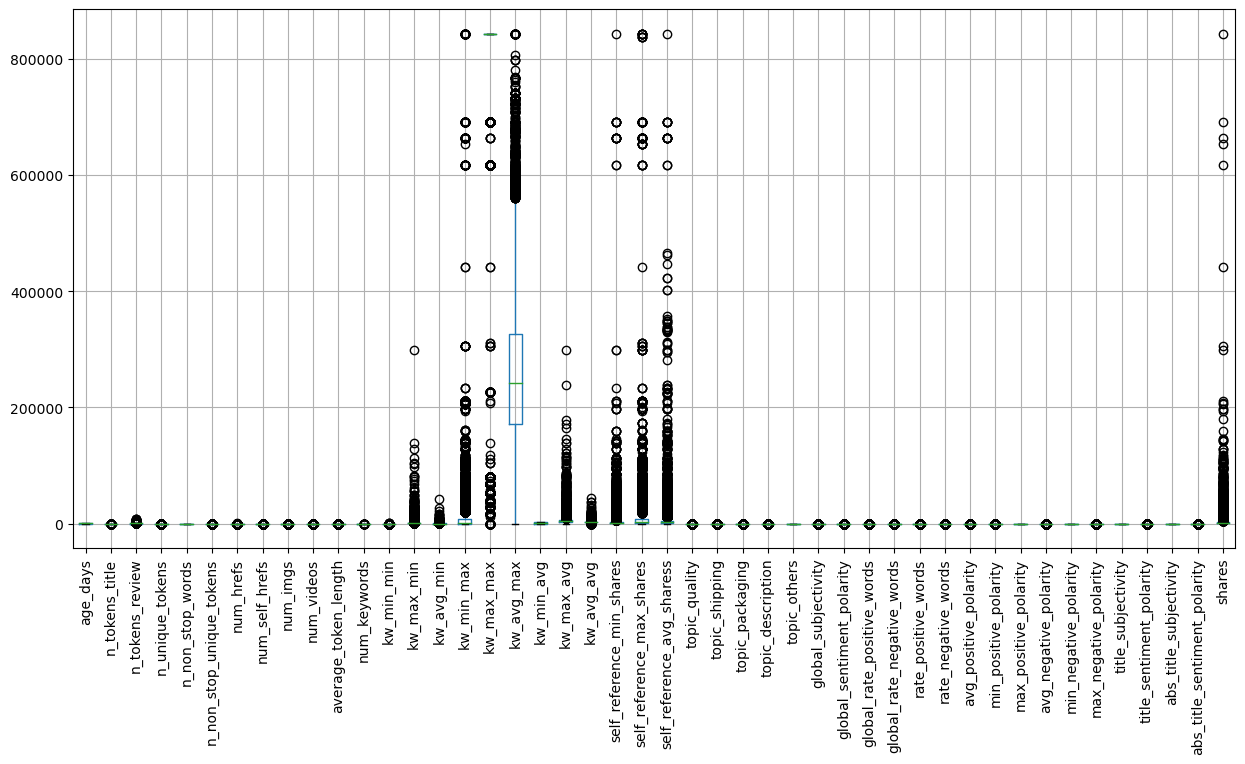

In [50]:
%matplotlib inline
model.boxplot(figsize=(15, 7), rot=90)

## Find the correlation between features and target

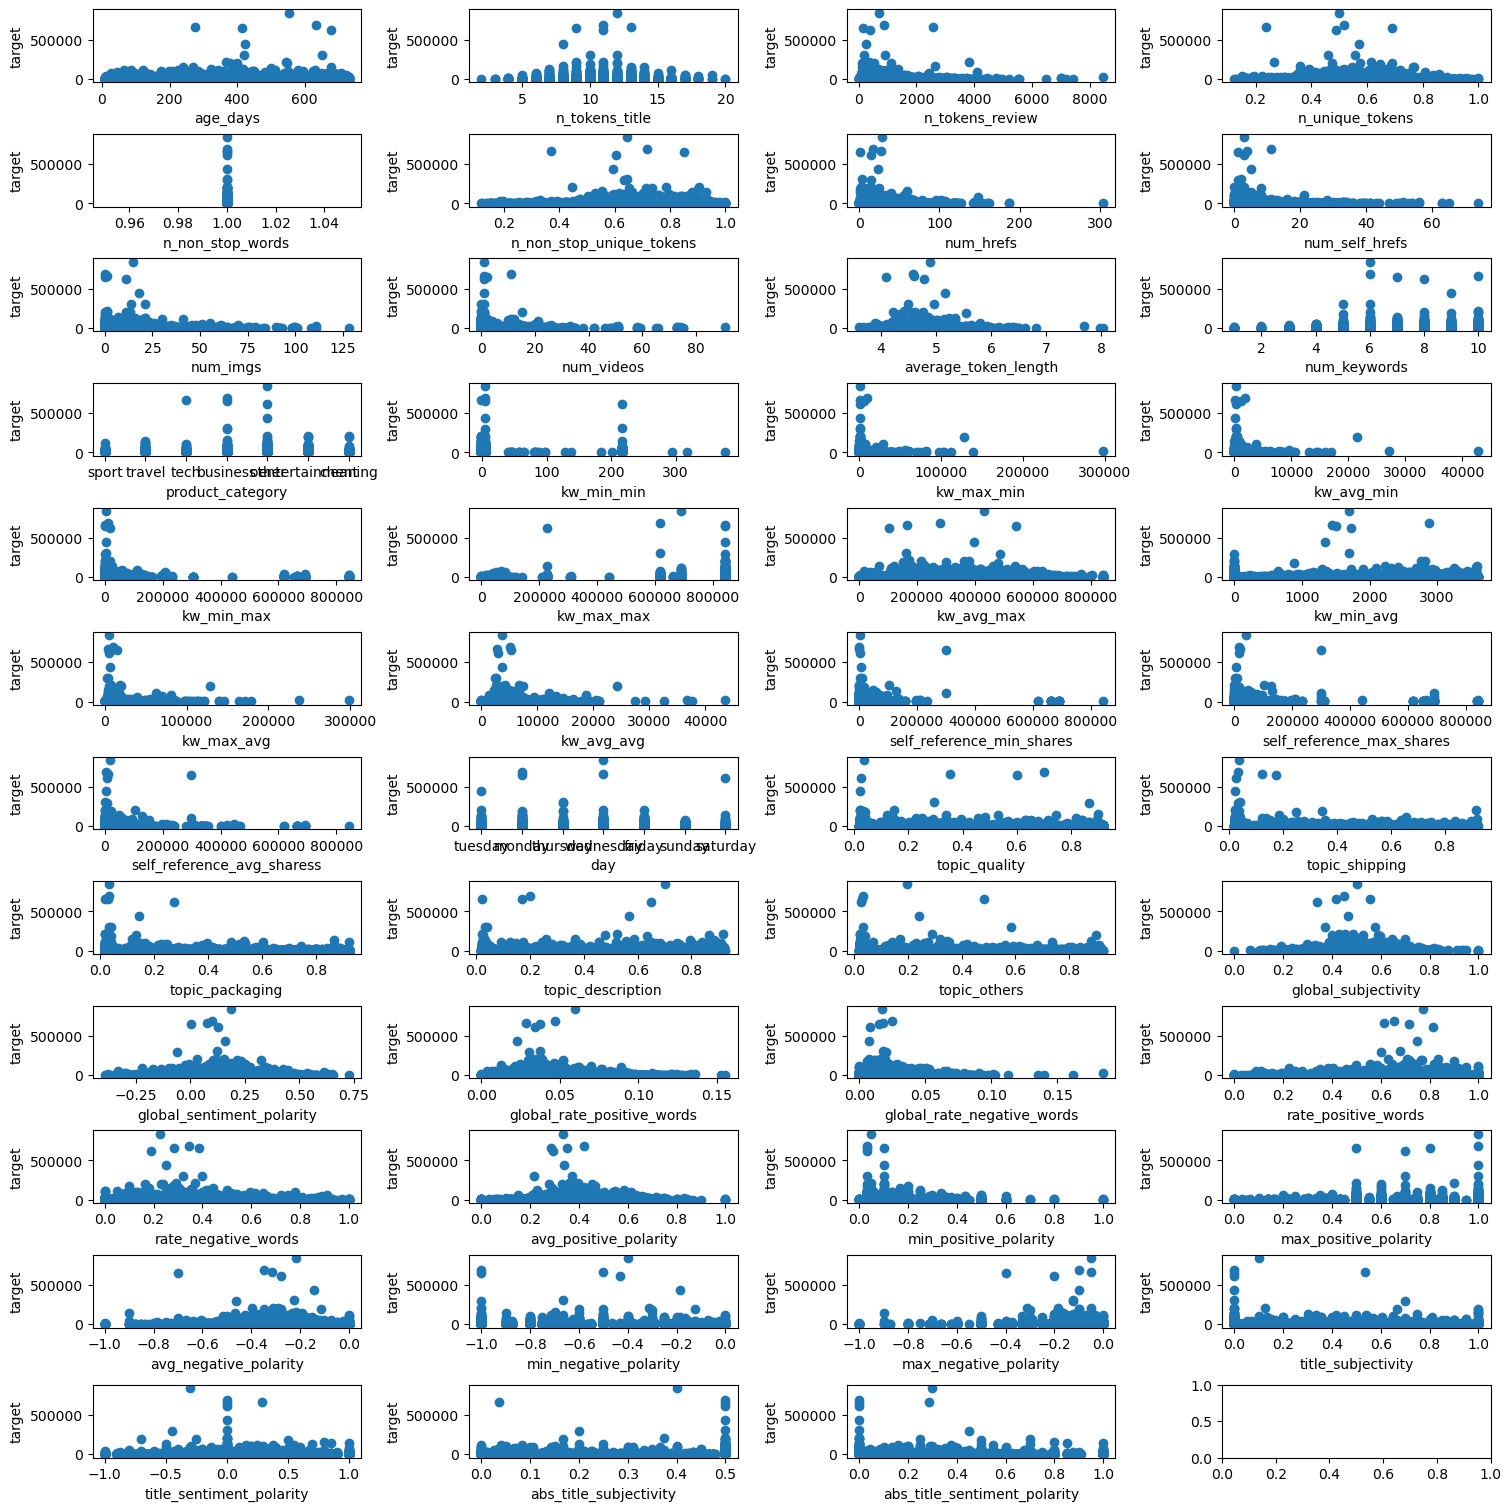

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(12, 4,figsize=[15,15],constrained_layout=True)
axes = axes.flatten()
i=0
for x in model.columns[:-1]:
    plt.sca(axes[i]) # set the current Axes
    plt.scatter(model[x],target)
    plt.xlabel(x)
    plt.ylabel("target")
    i+=1

plt.show()

In [52]:
#'product_category'
model_encoded = pd.get_dummies(model, columns=['product_category'], drop_first=True)

In [68]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

#'day'
model_encoded['day_encoded'] = label_encoder.fit_transform(model_encoded['day'])

#drop the original one
model_encoded.drop(columns=['day'], inplace=True)

model_encoded

KeyError: 'day'

# Split Data

In [81]:
import math
y = model_encoded['shares'].apply(lambda x: math.log(x+1))
X = model_encoded.drop(columns=['shares'])
X.tail()

,age_days,n_tokens_title,n_tokens_review,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,product_category_cleaning,product_category_entertainment,product_category_other,product_category_sport,product_category_tech,product_category_travel,day_encoded
27995,694,9,214,0.4554,1.0,0.4124,43,3,11,0,...,0.0000,0.5000,0.0000,False,False,True,False,False,False,6
27996,428,8,206,0.6471,1.0,0.8512,5,3,0,1,...,0.1364,0.0455,0.1364,False,False,False,False,False,False,6
27997,93,11,1083,0.5351,1.0,0.7126,32,27,11,1,...,0.0000,0.5000,0.0000,False,True,False,False,False,False,5
27998,90,12,817,0.4522,1.0,0.5852,12,0,2,0,...,0.0000,0.5000,0.0000,False,False,False,False,False,True,0
27999,681,13,1239,0.3827,1.0,0.5372,12,10,10,1,...,0.0682,0.2273,0.0682,False,False,False,True,False,False,5


In [82]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size =0.30, #by default is 75%-25%
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(19600, 52) (8400, 52)


# **Models**

In [83]:
from sklearn.model_selection import GridSearchCV
import numpy as np
import math

def gs_regression(model, par) :
    gs = GridSearchCV(model, par,cv=3,scoring ='neg_mean_absolute_error', error_score='raise')
    gs = gs.fit(X_train,y_train)

    #summarize the results of your GRIDSEARCH
    print('***GRIDSEARCH RESULTS***')
    print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']
    params = gs.cv_results_['params']
    #for mean, stdev, param in zip(means, stds, params):
    #    print("%f (%f) with: %r" % (mean, stdev, param))

    y_pred_train=gs.predict(X_train)
    y_pred_test=gs.predict(X_test)

    y_train_exp=y_train.apply(lambda x: math.exp(x)-1)
    y_test_exp=y_test.apply(lambda x: math.exp(x)-1)
    y_pred_train_exp=np.exp(y_pred_train)-1
    y_pred_test_exp=np.exp(y_pred_test)-1


    from sklearn import metrics
    print()
    print("MAE  train %.3f (%f)  test %.3f (%f)" % (metrics.mean_absolute_error(y_train, y_pred_train), metrics.mean_absolute_error(y_train_exp, y_pred_train_exp) ,metrics.mean_absolute_error(y_test, y_pred_test),  metrics.mean_absolute_error(y_test_exp, y_pred_test_exp)  ) )
    print("MSE  train %.3f              test %.3f" % (metrics.mean_squared_error(y_train, y_pred_train), metrics.mean_squared_error(y_test, y_pred_test)) )
    print("RMSE train %.3f              test %.3f" % (np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)), np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))) )
    print("r2   train %.3f              test %.3f" % (metrics.r2_score(y_train, y_pred_train), metrics.r2_score(y_test, y_pred_test)) )

In [14]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
parameters = {}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -0.640347 using {}

MAE  train 0.637 (2435.225598)  test 0.638 (2371.847558)
MSE  train 0.740              test 0.748
RMSE train 0.860              test 0.865
r2   train 0.140              test 0.129


In [15]:
from sklearn.linear_model import Lasso

regressor = Lasso()
parameters = {"alpha": [0.001,0.01,0.1,1,10]}#, "standardize": [True, False]}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -0.639580 using {'alpha': 0.001}

MAE  train 0.638 (2437.392691)  test 0.638 (2371.928764)
MSE  train 0.741              test 0.748
RMSE train 0.861              test 0.865
r2   train 0.138              test 0.129


In [36]:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor()

parameters = {'n_neighbors': np.arange(20,50,10),
              'p': [1,2]
            }

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -0.663186 using {'n_neighbors': 40, 'p': 1}

MAE  train 0.645 (2426.297107)  test 0.663 (2414.600635)
MSE  train 0.754              test 0.804
RMSE train 0.868              test 0.897
r2   train 0.123              test 0.064


In [37]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
parameters = {"max_depth": np.arange(1,18),
              "min_samples_leaf": np.arange(5,8)}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -0.656732 using {'max_depth': 5, 'min_samples_leaf': 7}

MAE  train 0.644 (2425.325881)  test 0.658 (2418.578147)
MSE  train 0.744              test 0.784
RMSE train 0.862              test 0.885
r2   train 0.135              test 0.087


In [22]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()
parameters = {"n_estimators":[10,100,200], "criterion": ['squared_error'],  # squared_error
              "min_samples_leaf": [10,30], "random_state" : [42]}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -0.629577 using {'criterion': 'squared_error', 'min_samples_leaf': 10, 'n_estimators': 200, 'random_state': 42}

MAE  train 0.450 (2022.665388)  test 0.625 (2354.937378)
MSE  train 0.391              test 0.719
RMSE train 0.625              test 0.848
r2   train 0.546              test 0.163


In [28]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()
parameters = {"n_estimators": [5, 20, 50],
              "criterion": ['squared_error'],
              "min_samples_leaf": [50,100],
              "random_state": [42]
             }

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -0.633862 using {'criterion': 'squared_error', 'min_samples_leaf': 50, 'n_estimators': 50, 'random_state': 42}

MAE  train 0.586 (2315.955071)  test 0.631 (2361.407615)
MSE  train 0.627              test 0.731
RMSE train 0.792              test 0.855
r2   train 0.270              test 0.149


In [31]:
regressor.fit(X_train, y_train)

importances = regressor.feature_importances_

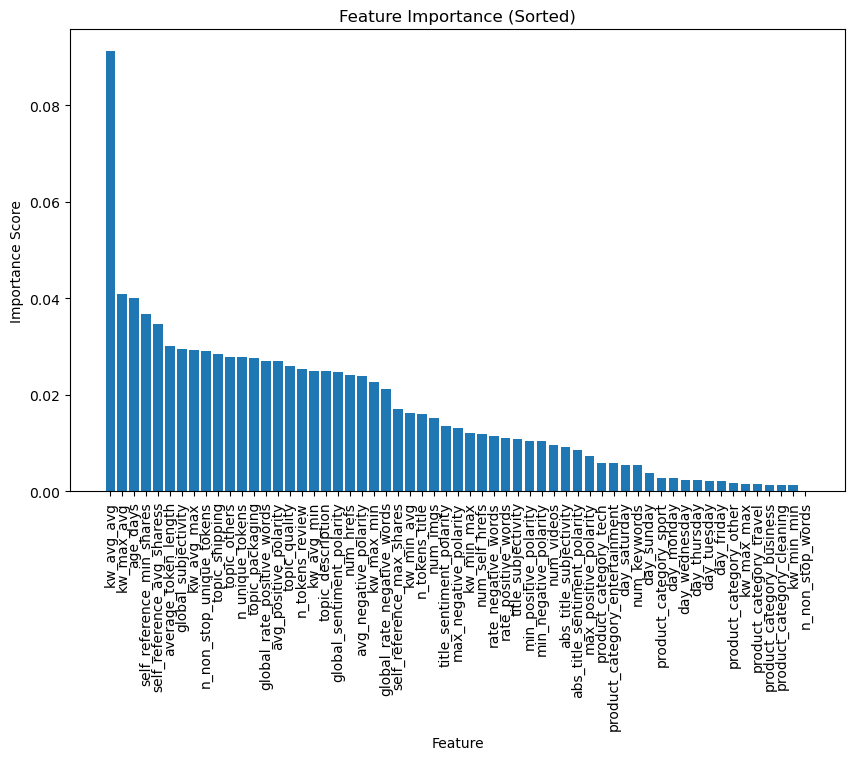

In [37]:
feature_names = X_train.columns

sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), sorted_importances, align='center')
plt.xticks(range(len(importances)), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance (Sorted)')
plt.show()

In [84]:
from sklearn.ensemble import AdaBoostRegressor

regressor = AdaBoostRegressor() 
parameters = {"n_estimators":[5,10,100,300], "learning_rate":[0.001, 0.1,0.5,1,2], 
              "loss": ['linear', 'square'], "random_state" : [0]}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -0.658257 using {'learning_rate': 0.001, 'loss': 'linear', 'n_estimators': 100, 'random_state': 0}

MAE  train 0.655 (2442.435070)  test 0.655 (2397.315454)
MSE  train 0.759              test 0.771
RMSE train 0.871              test 0.878
r2   train 0.117              test 0.103


In [71]:
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor() 
parameters = {"n_estimators":[50,100], "learning_rate":[0.01, 0.1], 
              "random_state" : [10] ,
             "max_depth":[3,5]}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -0.624215 using {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'random_state': 10}

MAE  train 0.552 (2205.093091)  test 0.620 (2352.663209)
MSE  train 0.539              test 0.714
RMSE train 0.734              test 0.845
r2   train 0.373              test 0.169


# **Feature Engineering**

In [72]:
#Standardize
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(model_encoded)

# Round the scaled data to 4 decimal places
scaled_data_rounded = np.round(scaled_data, decimals=4)

scaled_model = pd.DataFrame(scaled_data_rounded, columns=model_encoded.columns)

scaled_model

,age_days,n_tokens_title,n_tokens_review,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,abs_title_subjectivity,abs_title_sentiment_polarity,shares,product_category_cleaning,product_category_entertainment,product_category_other,product_category_sport,product_category_tech,product_category_travel,day_encoded
0,0.3558,-0.6549,-0.0595,-0.8297,0.0,-0.9798,-0.3702,0.9490,-0.4300,-0.2993,...,-1.8147,1.5255,-0.0961,-0.2395,-0.4666,-0.4102,3.9682,-0.4843,-0.5158,0.7998
1,-0.8251,2.6680,0.9749,-0.9869,0.0,-0.5475,-0.6328,-0.3626,-0.1883,2.3111,...,0.5713,-0.3553,-0.2061,-0.2395,-0.4666,-0.4102,-0.2520,-0.4843,1.9387,-1.0713
2,-0.7075,0.7692,-0.1155,-0.0069,0.0,-0.0015,-0.2827,-0.1003,-0.3091,-0.0620,...,0.8364,-0.6872,-0.1915,-0.2395,-0.4666,-0.4102,-0.2520,-0.4843,1.9387,0.3320
3,1.7060,0.2945,-0.6866,-0.0333,0.0,-0.4437,-0.5453,0.1621,-0.4300,-0.0620,...,0.8364,-0.6872,-0.2185,-0.2395,-0.4666,-0.4102,-0.2520,-0.4843,1.9387,0.7998
4,-0.0723,0.2945,0.9124,-1.3802,0.0,-0.9768,-0.0201,0.9490,-0.4300,-0.0620,...,0.8364,-0.6872,-0.1915,-0.2395,-0.4666,-0.4102,-0.2520,2.0647,-0.5158,0.7998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,1.5696,-0.6549,-0.7448,-0.8971,0.0,-2.7801,2.7809,-0.1003,0.7784,-0.2993,...,0.8364,-0.6872,0.3173,-0.2395,-0.4666,2.4378,-0.2520,-0.4843,-0.5158,1.2676
27996,0.3181,-1.1297,-0.7621,0.9740,0.0,1.5604,-0.5453,-0.1003,-0.5508,-0.0620,...,-1.5734,-0.0836,0.2140,-0.2395,-0.4666,-0.4102,-0.2520,-0.4843,-0.5158,1.2676
27997,-1.2579,0.2945,1.1280,-0.1192,0.0,0.1894,1.8181,6.1955,0.7784,-0.0620,...,0.8364,-0.6872,-0.1756,-0.2395,2.1432,-0.4102,-0.2520,-0.4843,-0.5158,0.7998
27998,-1.2720,0.7692,0.5547,-0.9283,0.0,-1.0708,0.0674,-0.8872,-0.3091,-0.2993,...,0.8364,-0.6872,-0.1756,-0.2395,-0.4666,-0.4102,-0.2520,-0.4843,1.9387,-1.5391


In [87]:
import math
y_scaled = scaled_model['shares'].apply(lambda x: math.log(x+1))
X_scaled = scaled_model.drop(columns=['shares'])

from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled,
                                                            test_size =0.30, #by default is 75%-25%
                                                            random_state= 123) #fix random seed for replicability

In [89]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()
parameters = {"n_estimators":[10,100,200], "criterion": ['squared_error'],  # squared_error
              "min_samples_leaf": [10,30], "random_state" : [42]}

gs_regression(regressor, parameters, X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled)

***GRIDSEARCH RESULTS***
Best score: -0.158721 using {'criterion': 'squared_error', 'min_samples_leaf': 30, 'n_estimators': 100, 'random_state': 42}

MAE  train 0.142 (0.192450)  test 0.159 (0.207002)
MSE  train 0.062              test 0.075
RMSE train 0.250              test 0.274
r2   train 0.256              test 0.090


In [88]:
from sklearn.model_selection import GridSearchCV
import numpy as np
import math

def gs_regression(model, par, X_train, X_test, y_train, y_test) :
    gs = GridSearchCV(model, par, cv=3, scoring='neg_mean_absolute_error', error_score='raise')
    gs = gs.fit(X_train, y_train)

    #summarize the results of your GRIDSEARCH
    print('***GRIDSEARCH RESULTS***')
    print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']
    params = gs.cv_results_['params']
    #for mean, stdev, param in zip(means, stds, params):
    #    print("%f (%f) with: %r" % (mean, stdev, param))

    y_pred_train = gs.predict(X_train)
    y_pred_test = gs.predict(X_test)

    y_train_exp = y_train.apply(lambda x: math.exp(x)-1)
    y_test_exp = y_test.apply(lambda x: math.exp(x)-1)
    y_pred_train_exp = np.exp(y_pred_train)-1
    y_pred_test_exp = np.exp(y_pred_test)-1

    from sklearn import metrics
    print()
    print("MAE  train %.3f (%f)  test %.3f (%f)" % (metrics.mean_absolute_error(y_train, y_pred_train), metrics.mean_absolute_error(y_train_exp, y_pred_train_exp) ,metrics.mean_absolute_error(y_test, y_pred_test),  metrics.mean_absolute_error(y_test_exp, y_pred_test_exp)  ) )
    print("MSE  train %.3f              test %.3f" % (metrics.mean_squared_error(y_train, y_pred_train), metrics.mean_squared_error(y_test, y_pred_test)) )
    print("RMSE train %.3f              test %.3f" % (np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)), np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))) )
    print("r2   train %.3f              test %.3f" % (metrics.r2_score(y_train, y_pred_train), metrics.r2_score(y_test, y_pred_test)) )

# 第一次資料處理和模型訓練
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()
parameters = {"n_estimators":[10,100,200], "criterion": ['squared_error'],  # squared_error
              "min_samples_leaf": [10,30], "random_state" : [42]}

gs_regression(regressor, parameters, X_train, X_test, y_train, y_test)

# 第二次資料處理和模型訓練
gs_regression(regressor, parameters, X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled)

***GRIDSEARCH RESULTS***
Best score: -0.630925 using {'criterion': 'squared_error', 'min_samples_leaf': 10, 'n_estimators': 200, 'random_state': 42}

MAE  train 0.451 (2024.236811)  test 0.627 (2356.932271)
MSE  train 0.392              test 0.721
RMSE train 0.626              test 0.849
r2   train 0.544              test 0.161
***GRIDSEARCH RESULTS***
Best score: -0.158721 using {'criterion': 'squared_error', 'min_samples_leaf': 30, 'n_estimators': 100, 'random_state': 42}

MAE  train 0.142 (0.192450)  test 0.159 (0.207002)
MSE  train 0.062              test 0.075
RMSE train 0.250              test 0.274
r2   train 0.256              test 0.090


# Filter our the outliers

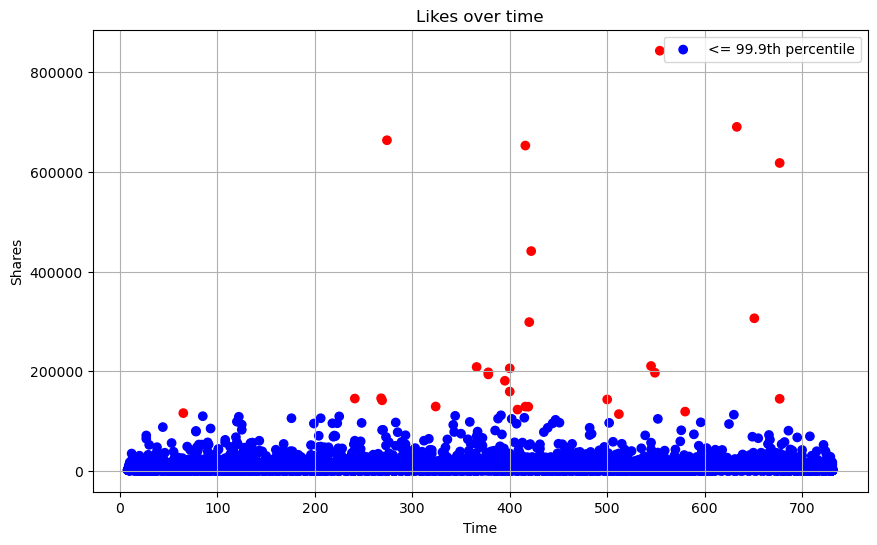

In [92]:
#Outliers
x = model['age_days']

# Calculate the 75th percentile of the target variable
percentile = np.percentile(target, 99.9)

# Create a figure and axis for the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, target, c=np.where(target <= percentile, 'blue', 'red'))

# Add labels and title to the plot
plt.xlabel("Time")
plt.ylabel("Shares")
plt.title("Likes over time")

# Add a legend for color representation
plt.legend(['<= 99.9th percentile', '> 99.9th percentile'])

# Display the grid
plt.grid()

# Show the plot
plt.show()

In [109]:
# Calculate the 99.9th percentile of the target variable
percentile = np.percentile(target, 99.9)

# Identify outliers
outliers_indices = np.where(target > percentile)[0]

# Remove outliers from your data
model_cleaned = model.drop(index=outliers_indices)
target_cleaned = target.drop(index=outliers_indices)
model_cleaned

,age_days,n_tokens_title,n_tokens_review,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,436,9,532,0.4623,1.0,0.5944,7,7,1,0,...,0.1364,1.0,-0.1806,-0.2500,-0.1250,0.5000,0.5000,0.0000,0.5000,2200
1,185,16,1012,0.4462,1.0,0.6381,4,2,3,11,...,0.1000,0.9,-0.3190,-1.0000,-0.0500,0.0500,-0.0750,0.4500,0.0750,816
2,210,12,506,0.5466,1.0,0.6933,8,3,2,1,...,0.0500,0.5,-0.2927,-0.7500,-0.1000,0.0000,0.0000,0.5000,0.0000,1000
3,723,11,241,0.5439,1.0,0.6486,5,4,1,1,...,0.1364,0.7,0.0000,0.0000,0.0000,0.0000,0.0000,0.5000,0.0000,660
4,345,11,983,0.4059,1.0,0.5947,11,7,1,1,...,0.1000,1.0,-0.2565,-0.8000,-0.0500,0.0000,0.0000,0.5000,0.0000,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,694,9,214,0.4554,1.0,0.4124,43,3,11,0,...,0.2000,1.0,-0.3333,-0.3333,-0.3333,0.0000,0.0000,0.5000,0.0000,7400
27996,428,8,206,0.6471,1.0,0.8512,5,3,0,1,...,0.1000,0.5,-0.6222,-1.0000,-0.1667,0.4545,0.1364,0.0455,0.1364,6100
27997,93,11,1083,0.5351,1.0,0.7126,32,27,11,1,...,0.1000,1.0,-0.4043,-1.0000,-0.0500,0.0000,0.0000,0.5000,0.0000,1200
27998,90,12,817,0.4522,1.0,0.5852,12,0,2,0,...,0.1000,0.7,-0.2889,-0.9000,-0.1000,0.0000,0.0000,0.5000,0.0000,1200


In [110]:
#'product_category'
model_cleaned = pd.get_dummies(model_cleaned, columns=['product_category'], drop_first=True)

In [111]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_cleaned = LabelEncoder()

#'day'
model_cleaned['day_encoded'] = label_cleaned.fit_transform(model_cleaned['day'])

#drop the original one
model_cleaned.drop(columns=['day'], inplace=True)

model_cleaned

,age_days,n_tokens_title,n_tokens_review,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,abs_title_subjectivity,abs_title_sentiment_polarity,shares,product_category_cleaning,product_category_entertainment,product_category_other,product_category_sport,product_category_tech,product_category_travel,day_encoded
0,436,9,532,0.4623,1.0,0.5944,7,7,1,0,...,0.0000,0.5000,2200,False,False,False,True,False,False,5
1,185,16,1012,0.4462,1.0,0.6381,4,2,3,11,...,0.4500,0.0750,816,False,False,False,False,False,True,1
2,210,12,506,0.5466,1.0,0.6933,8,3,2,1,...,0.5000,0.0000,1000,False,False,False,False,False,True,4
3,723,11,241,0.5439,1.0,0.6486,5,4,1,1,...,0.5000,0.0000,660,False,False,False,False,False,True,5
4,345,11,983,0.4059,1.0,0.5947,11,7,1,1,...,0.5000,0.0000,1000,False,False,False,False,True,False,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,694,9,214,0.4554,1.0,0.4124,43,3,11,0,...,0.5000,0.0000,7400,False,False,True,False,False,False,6
27996,428,8,206,0.6471,1.0,0.8512,5,3,0,1,...,0.0455,0.1364,6100,False,False,False,False,False,False,6
27997,93,11,1083,0.5351,1.0,0.7126,32,27,11,1,...,0.5000,0.0000,1200,False,True,False,False,False,False,5
27998,90,12,817,0.4522,1.0,0.5852,12,0,2,0,...,0.5000,0.0000,1200,False,False,False,False,False,True,0


In [112]:
#Standardize
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_mc = scaler.fit_transform(model_cleaned)

# Round the scaled data to 4 decimal places
scaled_mc_rounded = np.round(scaled_mc, decimals=4)

scaled_model_c = pd.DataFrame(scaled_mc_rounded, columns=model_cleaned.columns)

scaled_model_c

,age_days,n_tokens_title,n_tokens_review,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,abs_title_subjectivity,abs_title_sentiment_polarity,shares,product_category_cleaning,product_category_entertainment,product_category_other,product_category_sport,product_category_tech,product_category_travel,day_encoded
0,0.3560,-0.6548,-0.0593,-0.8299,0.0,-0.9802,-0.3700,0.9485,-0.4296,-0.2992,...,-1.8144,1.5269,-0.1460,-0.2395,-0.4667,-0.4097,3.9673,-0.4846,-0.5160,0.7998
1,-0.8246,2.6682,0.9766,-0.9871,0.0,-0.5478,-0.6327,-0.3627,-0.1879,2.3107,...,0.5715,-0.3550,-0.3614,-0.2395,-0.4667,-0.4097,-0.2521,-0.4846,1.9381,-1.0714
2,-0.7070,0.7693,-0.1154,-0.0069,0.0,-0.0016,-0.2825,-0.1004,-0.3087,-0.0619,...,0.8366,-0.6871,-0.3328,-0.2395,-0.4667,-0.4097,-0.2521,-0.4846,1.9381,0.3320
3,1.7060,0.2946,-0.6872,-0.0332,0.0,-0.4439,-0.5451,0.1618,-0.4296,-0.0619,...,0.8366,-0.6871,-0.3857,-0.2395,-0.4667,-0.4097,-0.2521,-0.4846,1.9381,0.7998
4,-0.0720,0.2946,0.9140,-1.3806,0.0,-0.9772,-0.0198,0.9485,-0.4296,-0.0619,...,0.8366,-0.6871,-0.3328,-0.2395,-0.4667,-0.4097,-0.2521,2.0637,-0.5160,0.7998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27967,1.5696,-0.6548,-0.7455,-0.8973,0.0,-2.7811,2.7819,-0.1004,0.7788,-0.2992,...,0.8366,-0.6871,0.6632,-0.2395,-0.4667,2.4406,-0.2521,-0.4846,-0.5160,1.2676
27968,0.3184,-1.1295,-0.7628,0.9743,0.0,1.5609,-0.5451,-0.1004,-0.5504,-0.0619,...,-1.5731,-0.0831,0.4609,-0.2395,-0.4667,-0.4097,-0.2521,-0.4846,-0.5160,1.2676
27969,-1.2573,0.2946,1.1298,-0.1192,0.0,0.1894,1.8188,6.1935,0.7788,-0.0619,...,0.8366,-0.6871,-0.3017,-0.2395,2.1427,-0.4097,-0.2521,-0.4846,-0.5160,0.7998
27970,-1.2714,0.7693,0.5558,-0.9285,0.0,-1.0712,0.0678,-0.8872,-0.3087,-0.2992,...,0.8366,-0.6871,-0.3017,-0.2395,-0.4667,-0.4097,-0.2521,-0.4846,1.9381,-1.5392


In [113]:
import math
y_smc = scaled_model_c['shares'].apply(lambda x: math.log(x+1))
X_smc = scaled_model_c.drop(columns=['shares'])

from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train_smc, X_test_smc, y_train_smc, y_test_smc = train_test_split(X_smc, y_smc,
                                                            test_size =0.30, #by default is 75%-25%
                                                            random_state= 123) #fix random seed for replicability

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()
parameters = {"n_estimators":[10,100,200], "criterion": ['squared_error'],  # squared_error
              "min_samples_leaf": [10,30], "random_state" : [42]}

gs_regression(regressor, parameters, X_train_smc, X_test_smc, y_train_smc, y_test_smc)

# **Model Evaluation**

# **Predictions with Model**